<h1 align=center><font size = 5>Comparison of Neighborhoods in Toronto and New York</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Download and Explore Dataset</a>

2.  <a href="#item2">Explore Neighborhoods in Toronto</a>

3.  <a href="#item3">Analyze Each Neighborhood</a>

4.  <a href="#item4">Cluster Neighborhoods</a>

5.  <a href="#item5">Examine Clusters</a>  
    </font>
    </div>


Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import ArcGIS # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import time



**Dear reviewer!**

Due to a well known looping issue of the Foursqare sign up procedure (see [Forum](https://www.coursera.org/learn/applied-data-science-capstone/discussions/weeks/2/threads/GBEHazsAEeuipg7jhk5jrQ), I wasn't able to create a developer account to use the API in this exercise.
To proceed with the course, I obtained a developer account on [Yelp](https://www.yelp.de/developers?country=US) and used the Yelp [Yelp Fusion API](https://www.yelp.de/fusion) instead.
To check the code below, please insert your own Yelp API Key or simply import the Yelp data from Excel-file below. 

In [83]:
from yelpapi import YelpAPI
import argparse

MY_API_KEY = ""
yelp_api = YelpAPI(MY_API_KEY)


## 1. Download and Explore Basic Datasets

## 1.1 Load and explore the basic New York data


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [9]:
newyork_neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [10]:
newyork_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [11]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NewYork_neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time.


In [12]:
for data in newyork_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NewYork_neighborhoods = NewYork_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [14]:
NewYork_neighborhoods.head(50)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [16]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NewYork_neighborhoods['Borough'].unique()),
        NewYork_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


### 1.2 Load and Explore Toronto Boroughs and Neighborhoods 

Copied raw data of Toronto boroughs and neighborhoods from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M to csv-file: Toronto.csv

In [30]:
toronto_data = pd.read_csv("Toronto.csv", sep=';')
toronto_data

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


We only need entries with a borough assigned to the postalcode. We also drop PO Boxes from the dataset.

In [31]:
toronto_data = toronto_data[toronto_data['Borough'] != 'Not assigned']
toronto_data.shape

(103, 3)

We also drop PO Boxes from the dataset.

In [32]:
toronto_data = toronto_data[~toronto_data['PostalCode'].isin(['M5W', 'M7Y'])]
toronto_data.shape

(101, 3)

In [29]:
toronto_data

,PostalCode,Borough,Neighborhood
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
13,M5B,Downtown Toronto,"Garden District, Ryerson"
22,M5C,Downtown Toronto,St. James Town
30,M4E,East Toronto,The Beaches
31,M5E,Downtown Toronto,Berczy Park
40,M5G,Downtown Toronto,Central Bay Street
41,M6G,Downtown Toronto,Christie
49,M5H,Downtown Toronto,"Richmond, Adelaide, King"
50,M6H,West Toronto,"Dufferin, Dovercourt Village"


Define a function to get the latitude and longitude of the neighborhoods

In [33]:
def getLocationFromPostcode(postcode, country):
    geolocator = ArcGIS(user_agent="toronto_explorer")
    location = geolocator.geocode(query=postcode+' '+country)
    latitude = location.latitude
    longitude = location.longitude
    
    return(latitude, longitude)


In [34]:
toronto_data['Latitude'] = toronto_data['PostalCode'].apply(
    lambda x: getLocationFromPostcode(x, 'Canada')[0])
toronto_data['Longitude'] = toronto_data['PostalCode'].apply(
    lambda x: getLocationFromPostcode(x, 'Canada')[1])
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M3A,North York,Parkwoods,43.75245,-79.32991
3,M4A,North York,Victoria Village,43.73057,-79.31306
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.66263,-79.52831
9,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
11,M3B,North York,Don Mills,43.74923,-79.36186
12,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
13,M5B,Downtown Toronto,"Garden District, Ryerson",43.65739,-79.37804


In [35]:
toronto_data.to_excel('toronto_data.xls', index=False)

## 1.3 Combine New York and Toronto data

Combine the two datasets

In [44]:
# clean up Toronto data 
toronto_neighborhoods = toronto_data.drop(['PostalCode'], axis=1)

In [45]:
toronto_neighborhoods.insert(0, 'City', 'Toronto')
NewYork_neighborhoods.insert(0, 'City', 'New York')

In [49]:
all_neighborhoods = NewYork_neighborhoods.append(toronto_neighborhoods)

In [56]:
all_neighborhoods

,City,Borough,Neighborhood,Latitude,Longitude
0,New York,Bronx,Wakefield,40.894705,-73.847201
1,New York,Bronx,Co-op City,40.874294,-73.829939
2,New York,Bronx,Eastchester,40.887556,-73.827806
3,New York,Bronx,Fieldston,40.895437,-73.905643
4,New York,Bronx,Riverdale,40.890834,-73.912585
5,New York,Bronx,Kingsbridge,40.881687,-73.902818
6,New York,Manhattan,Marble Hill,40.876551,-73.910660
7,New York,Bronx,Woodlawn,40.898273,-73.867315
8,New York,Bronx,Norwood,40.877224,-73.879391
9,New York,Bronx,Williamsbridge,40.881039,-73.857446


## 2. Explore Neighborhoods in Toronto and New York

Create a function to get all venues for all the neighborhoods in Toronto and New York

In [100]:
def getNearbyVenues(neighborhoods, boroughs, cities, latitudes, longitudes, radius=500):
    
    all_venues = pd.DataFrame(columns = ['Neighborhood', 'Borough', 'City',
    'Neighborhood', 'Latitude', 'Neighborhood Longitude', 'Venue',
    'Venue Latitude', 'Venue Longitude', 'Venue Category'])
    
    for neighborhood, borough, city, lat, lng in zip(neighborhoods, boroughs, cities, latitudes, longitudes):
        try:
            print(neighborhood)    
            # get results from Yelp
            results = yelp_api.search_query(longitude=lng, latitude=lat, radius=radius, limit=50)
            
            #check if there are businesses listed in the neighborhood
            total_result = results['total']
            print(neighborhood, total_result, 'venues')
            
            if total_result > 0:
                
                results_cols = list(results['businesses'][0].keys())
                
                if total_result > 1000:
                    total_result = 999
                    
                # loop through Yelp results pages by 50 items to get all entries from Yelp
                all_items = []
                
                for offset in range(0, total_result, 50):
                    results = yelp_api.search_query(
                        longitude=lng,
                        latitude=lat,
                        radius=radius,
                        limit=50,
                        offset=offset) 
                    all_items.extend(results['businesses'])
                    # wait  to slow down api calls
                    time.sleep(1)
                    
                # initialise temporary dataframe with column names from business dictionary
                data = pd.DataFrame(all_items, columns=results_cols)
                
                # extract categories alias from business dataframe 
                data_categories = data.categories.apply(pd.Series)[0].apply(pd.Series)
                
                # extract coordinates (lat & lng) business dataframe
                data_coordinates = data.coordinates.apply(pd.Series)
                
                # extract venue names from business dataframe
                data_names = data.name
                
                # combine extracted information to a temporary dataframe to add to all venues dataframe
                add_venues  = pd.concat([data_names, data_categories['alias'], data_coordinates], axis=1)
                
                add_venues['Neighborhood'] = neighborhood
                add_venues['Borough'] = borough
                add_venues['City'] = city
                add_venues['Neighborhood Latitude'] = lat 
                add_venues['Neighborhood Longitude'] = lng 
                add_venues.rename(columns={"name": "Venue", 
                                          "latitude": "Venue Latitude", 
                                          "longitude": "Venue Longitude" , 
                                          "alias": "Venue Category"}, 
                                 inplace=True)
                
                all_venues = all_venues.append(add_venues, ignore_index=True)
                
                # wait before requesting the next neighborhoods venues due to Queries-Per-Second (QPS) Rate Limiting
                time.sleep(1)
        except:
            print(results)
        
    nearby_venues = all_venues

    return(nearby_venues)

Get all venues for all neighborhoods.

In [84]:
all_cities_venues = getNearbyVenues(neighborhoods=all_neighborhoods['Neighborhood'],
                                  boroughs=all_neighborhoods['Borough'],
                                  cities=all_neighborhoods['City'],
                                   latitudes=all_neighborhoods['Latitude'],
                                   longitudes=all_neighborhoods['Longitude']
                                  )
all_cities_venues.to_excel('all_cities_venues.xls', index=False)

Wakefield
Wakefield 10 venues
Co-op City
Co-op City 10 venues
Eastchester
Eastchester 14 venues
Fieldston
Fieldston 3 venues
Riverdale
Riverdale 42 venues
Kingsbridge
Kingsbridge 70 venues
Marble Hill
Marble Hill 40 venues
Woodlawn
Woodlawn 24 venues
Norwood
Norwood 48 venues
Williamsbridge
Williamsbridge 14 venues
Baychester
Baychester 12 venues
Pelham Parkway
Pelham Parkway 23 venues
City Island
City Island 53 venues
Bedford Park
Bedford Park 46 venues
University Heights
University Heights 38 venues
Morris Heights
Morris Heights 30 venues
Fordham
Fordham 85 venues
East Tremont
East Tremont 27 venues
West Farms
West Farms 12 venues
High  Bridge
High  Bridge 23 venues
Melrose
Melrose 35 venues
Mott Haven
Mott Haven 36 venues
Port Morris
Port Morris 12 venues
Longwood
Longwood 24 venues
Hunts Point
Hunts Point 7 venues
Morrisania
Morrisania 20 venues
Soundview
Soundview 11 venues
Clason Point
Clason Point 3 venues
Throgs Neck
Throgs Neck 11 venues
Country Club
Country Club 6 venues
Park

West Village 395 venues
Manhattan Valley
Manhattan Valley 149 venues
Morningside Heights
Morningside Heights 97 venues
Gramercy
Gramercy 264 venues
Battery Park City
Battery Park City 154 venues
Financial District
Financial District 491 venues
Astoria
Astoria 186 venues
Woodside
Woodside 124 venues
Jackson Heights
Jackson Heights 283 venues
Elmhurst
Elmhurst 215 venues
Howard Beach
Howard Beach 96 venues
Corona
Corona 113 venues
Forest Hills
Forest Hills 120 venues
Kew Gardens
Kew Gardens 114 venues
Richmond Hill
Richmond Hill 120 venues
Flushing
Flushing 198 venues
Long Island City
Long Island City 153 venues
Sunnyside
Sunnyside 91 venues
East Elmhurst
East Elmhurst 14 venues
Maspeth
Maspeth 127 venues
Ridgewood
Ridgewood 138 venues
Glendale
Glendale 10 venues
Rego Park
Rego Park 148 venues
Woodhaven
Woodhaven 121 venues
Ozone Park
Ozone Park 41 venues
South Ozone Park
South Ozone Park 5 venues
College Point
College Point 114 venues
Whitestone
Whitestone 85 venues
Bayside
Bayside 117 

Northwood Park, York University 16 venues
East Toronto, Broadview North (Old East York)
East Toronto, Broadview North (Old East York) 1 venues
Harbourfront East, Union Station, Toronto Islands
Harbourfront East, Union Station, Toronto Islands 258 venues
Little Portugal, Trinity
Little Portugal, Trinity 120 venues
Kennedy Park, Ionview, East Birchmount Park
Kennedy Park, Ionview, East Birchmount Park 4 venues
Bayview Village
Bayview Village 0 venues
Downsview
Downsview 20 venues
The Danforth West, Riverdale
The Danforth West, Riverdale 5 venues
Toronto Dominion Centre, Design Exchange
Toronto Dominion Centre, Design Exchange 494 venues
Brockton, Parkdale Village, Exhibition Place
Brockton, Parkdale Village, Exhibition Place 92 venues
Golden Mile, Clairlea, Oakridge
Golden Mile, Clairlea, Oakridge 5 venues
York Mills, Silver Hills
York Mills, Silver Hills 0 venues
Downsview
Downsview 11 venues
India Bazaar, The Beaches West
India Bazaar, The Beaches West 23 venues
Commerce Court, Victori

To get a first impression we reduce the dataset to central Toronto boroughs and Manhattan

In [297]:
# select Central Toronto and Manhattan
all_cities_venues = all_cities_venues[all_cities_venues['Borough'].str.contains('Toronto') | all_cities_venues['Borough'].str.contains('Manhattan')]

Combine city, borough and neighborhood in one column (needed for joining cluster labels to venues dataframe)

In [127]:
all_cities_venues['Neighborhood_long'] = all_cities_venues['City'] + '-' + all_cities_venues['Borough'] +  '-' + all_cities_venues['Neighborhood']  

#### Let's find out how many unique categories can be curated from all the returned venues

In [359]:
print('There are {} uniques categories.'.format(len(all_cities_venues['Venue Category'].unique())))

There are 287 uniques categories.


In [366]:
all_cities_venues.columns

Index(['City', 'Borough', 'Neighborhood', 'Neighborhood Latitude',
       'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude',
       'Venue Category', 'Neighborhood_long'],
      dtype='object')

## 3. Analyze Each Neighborhood

In [298]:
# one hot encoding
all_cities_onehot = pd.get_dummies(all_cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_cities_onehot['Neighborhood_long'] = all_cities_venues['Neighborhood_long'] 

# move neighborhood column to the first column
fixed_columns = [all_cities_onehot.columns[-1]] + list(all_cities_onehot.columns[:-1])
all_cities_onehot = all_cities_onehot[fixed_columns]

all_cities_onehot.head()

,Neighborhood_long,acaibowls,accessories,active,afghani,african,amusementparks,aquariums,aquariumservices,arcades,argentine,artmuseums,asianfusion,australian,austrian,axethrowing,bagels,bakeries,barbers,barreclasses,bars,bartenders,basque,bbq,beaches,beerbar,beergardens,belgian,beverage_stores,bistros,boating,bookstores,bowling,boxing,brasseries,brazilian,breakfast_brunch,breweries,brewpubs,british,bubbletea,buffets,burgers,butcher,cafes,cafeteria,cajun,cakeshop,cambodian,candy,cantonese,caribbean,catalan,catering,champagne_bars,cheese,cheesesteaks,chicken_wings,chickenshop,chinese,chocolate,churches,cigarbars,cocktailbars,coffee,coffeeroasteries,comedyclubs,comfortfood,convenience,creperies,cuban,culturalcenter,cupcakes,customcakes,czech,danceclubs,delicatessen,delis,desserts,dimsum,diners,dinnertheater,divebars,diyfood,dog_parks,dominican,donuts,drugstores,dumplings,egyptian,empanadas,ethiopian,eventplanning,facepainting,falafel,farmersmarket,festivals,filipino,fishnchips,fondue,food,food_court,fooddeliveryservices,foodstands,foodtours,foodtrucks,french,galleries,gardens,gastropubs,gaybars,gelato,georgian,german,giftshops,gluten_free,golf,golflessons,gourmet,greek,grocery,hair,haitian,hakka,halal,hawaiian,headshops,herbalshops,herbsandspices,hiking,himalayan,hkcafe,hobbyshops,hookah_bars,hotdog,hotdogs,hotels,hotpot,hungarian,icecream,indonesian,indpak,international,intlgrocery,irish,irish_pubs,italian,izakaya,japacurry,japanese,jazzandblues,jewelry,juicebars,karaoke,kebab,korean,kosher,lakes,landmarks,laotian,latin,laundromat,lebanese,libraries,localflavor,lounges,macarons,magicians,mags,malaysian,markets,meats,mediterranean,mexican,mideastern,mini_golf,modern_european,mongolian,moroccan,mountainbiking,movietheaters,museums,musicvenues,newamerican,newcanadian,newmexican,nightlife,nonprofit,noodles,organic_stores,pakistani,panasian,parks,pastashops,persian,peruvian,pianobars,pizza,playgrounds,poke,polish,poolhalls,popuprestaurants,popupshops,portuguese,postoffices,poutineries,pretzels,publicart,publicservicesgovt,pubs,rafting,ramen,raw_food,restaurants,russian,salad,salvadoran,sandwiches,scandinavian,seafood,seafoodmarkets,senegalese,shanghainese,sharedofficespaces,shavedsnow,shopping,sicilian,singaporean,skate_parks,skateshops,smokehouse,social_clubs,soulfood,soup,southafrican,southern,souvenirs,spanish,speakeasies,sportgoods,sports_clubs,sportsbars,sportswear,srilankan,steak,streetvendors,supperclubs,sushi,szechuan,tacos,taiwanese,tapas,tapasmallplates,tea,televisionstations,teppanyaki,tex-mex,thai,theater,themedcafes,tikibars,tobaccoshops,tours,tradamerican,turkish,tuscan,ukrainian,uzbek,vacation_rentals,vapeshops,vegan,vegetarian,venezuelan,venues,vietnamese,vintage,virtualrealitycenters,waffles,walkingtours,whiskeybars,wine_bars,womenscloth,wraps,yelpevents,yoga,zoos
149,New York-Manhattan-Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
150,New York-Manhattan-Marble Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [299]:
all_cities_grouped = all_cities_onehot.groupby('Neighborhood_long').mean().reset_index()
all_cities_grouped

,Neighborhood_long,acaibowls,accessories,active,afghani,african,amusementparks,aquariums,aquariumservices,arcades,argentine,artmuseums,asianfusion,australian,austrian,axethrowing,bagels,bakeries,barbers,barreclasses,bars,bartenders,basque,bbq,beaches,beerbar,beergardens,belgian,beverage_stores,bistros,boating,bookstores,bowling,boxing,brasseries,brazilian,breakfast_brunch,breweries,brewpubs,british,bubbletea,buffets,burgers,butcher,cafes,cafeteria,cajun,cakeshop,cambodian,candy,cantonese,caribbean,catalan,catering,champagne_bars,cheese,cheesesteaks,chicken_wings,chickenshop,chinese,chocolate,churches,cigarbars,cocktailbars,coffee,coffeeroasteries,comedyclubs,comfortfood,convenience,creperies,cuban,culturalcenter,cupcakes,customcakes,czech,danceclubs,delicatessen,delis,desserts,dimsum,diners,dinnertheater,divebars,diyfood,dog_parks,dominican,donuts,drugstores,dumplings,egyptian,empanadas,ethiopian,eventplanning,facepainting,falafel,farmersmarket,festivals,filipino,fishnchips,fondue,food,food_court,fooddeliveryservices,foodstands,foodtours,foodtrucks,french,galleries,gardens,gastropubs,gaybars,gelato,georgian,german,giftshops,gluten_free,golf,golflessons,gourmet,greek,grocery,hair,haitian,hakka,halal,hawaiian,headshops,herbalshops,herbsandspices,hiking,himalayan,hkcafe,hobbyshops,hookah_bars,hotdog,hotdogs,hotels,hotpot,hungarian,icecream,indonesian,indpak,international,intlgrocery,irish,irish_pubs,italian,izakaya,japacurry,japanese,jazzandblues,jewelry,juicebars,karaoke,kebab,korean,kosher,lakes,landmarks,laotian,latin,laundromat,lebanese,libraries,localflavor,lounges,macarons,magicians,mags,malaysian,markets,meats,mediterranean,mexican,mideastern,mini_golf,modern_european,mongolian,moroccan,mountainbiking,movietheaters,museums,musicvenues,newamerican,newcanadian,newmexican,nightlife,nonprofit,noodles,organic_stores,pakistani,panasian,parks,pastashops,persian,peruvian,pianobars,pizza,playgrounds,poke,polish,poolhalls,popuprestaurants,popupshops,portuguese,postoffices,poutineries,pretzels,publicart,publicservicesgovt,pubs,rafting,ramen,raw_food,restaurants,russian,salad,salvadoran,sandwiches,scandinavian,seafood,seafoodmarkets,senegalese,shanghainese,sharedofficespaces,shavedsnow,shopping,sicilian,singaporean,skate_parks,skateshops,smokehouse,social_clubs,soulfood,soup,southafrican,southern,souvenirs,spanish,speakeasies,sportgoods,sports_clubs,sportsbars,sportswear,srilankan,steak,streetvendors,supperclubs,sushi,szechuan,tacos,taiwanese,tapas,tapasmallplates,tea,televisionstations,teppanyaki,tex-mex,thai,theater,themedcafes,tikibars,tobaccoshops,tours,tradamerican,turkish,tuscan,ukrainian,uzbek,vacation_rentals,vapeshops,vegan,vegetarian,venezuelan,venues,vietnamese,vintage,virtualrealitycenters,waffles,walkingtours,whiskeybars,wine_bars,womenscloth,wraps,yelpevents,yoga,zoos
0,New York-Manhattan-Battery Park City,0.000000,0.006494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006494,0.000000,0.006494,0.000000,0.012987,0.006494,0.000000,0.000000,0.051948,0.000000,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.012987,0.000000,0.00,0.000000,0.006494,0.000000,0.006494,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006494,0.006494,0.000000,0.000000,0.000000,0.006494,0.123377,0.006494,0.000000,0.006494,0.006494,0.006494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.019481,0.000000,0.000000,0.000000,0.000000,0.000000,0.019481,0.000000,0.006494,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.006494,0.000000,0.006494,0.038961,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000,0.006494,0.000000,0.000000,0.000000

In [300]:
all_cities_grouped.shape

(74, 287)

#### Let's print each neighborhood along with the top 5 most common venues


In [301]:
num_top_venues = 5

for hood in all_cities_grouped['Neighborhood_long']:
    print("----"+hood+"----")
    temp = all_cities_grouped[all_cities_grouped['Neighborhood_long'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----New York-Manhattan-Battery Park City----
       venue  freq
0     coffee  0.12
1      parks  0.07
2      pizza  0.06
3  landmarks  0.06
4       bars  0.05


----New York-Manhattan-Carnegie Hill----
     venue  freq
0    pizza  0.10
1   coffee  0.10
2  italian  0.07
3   bagels  0.03
4    delis  0.03


----New York-Manhattan-Central Harlem----
       venue  freq
0    chinese  0.08
1  caribbean  0.07
2   bakeries  0.06
3      delis  0.06
4    hotdogs  0.05


----New York-Manhattan-Chelsea----
     venue  freq
0   coffee  0.05
1  italian  0.05
2    pizza  0.04
3  mexican  0.04
4    delis  0.04


----New York-Manhattan-Chinatown----
        venue  freq
0     chinese  0.14
1    bakeries  0.10
2      coffee  0.05
3     italian  0.05
4  foodtrucks  0.03


----New York-Manhattan-Civic Center----
         venue  freq
0       coffee  0.08
1   foodtrucks  0.06
2  newamerican  0.04
3     bakeries  0.04
4     japanese  0.03


----New York-Manhattan-Clinton----
     venue  freq
0   coffee  0.09
1

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [302]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [303]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood_long']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood_long'] = all_cities_grouped['Neighborhood_long']

for ind in np.arange(all_cities_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_cities_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood_long,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York-Manhattan-Battery Park City,coffee,parks,landmarks,pizza,bars,french,mexican,newamerican,museums,italian
1,New York-Manhattan-Carnegie Hill,coffee,pizza,italian,mexican,delis,japanese,bars,bagels,newamerican,vietnamese
2,New York-Manhattan-Central Harlem,chinese,caribbean,delis,bakeries,hotdogs,chicken_wings,breakfast_brunch,bars,coffee,french
3,New York-Manhattan-Chelsea,coffee,italian,bakeries,pizza,delis,mexican,newamerican,bars,cafes,lounges
4,New York-Manhattan-Chinatown,chinese,bakeries,coffee,italian,desserts,bubbletea,foodtrucks,pizza,bars,newamerican


## 4. Cluster Neighborhoods


Run an "elbow analysis" to find the best k

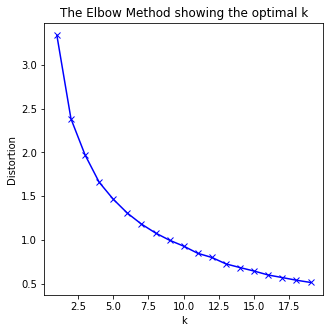

In [377]:
# all_cities_grouped_clustering = all_cities_grouped.drop('Neighborhood_long', 1)
import matplotlib.pyplot as plt
distortions = []
K = range(1,20)
for k in K:
    kmean_elbow = KMeans(n_clusters=k, random_state=42)
    kmean_elbow.fit(all_cities_grouped_clustering)
    distortions.append(kmean_elbow.inertia_)


plt.figure(figsize=(5,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Run _k_-means to cluster the neighborhood into 9 clusters.


In [383]:
# set number of clusters
kclusters = 5

all_cities_grouped_clustering = all_cities_grouped.drop('Neighborhood_long', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=42).fit(all_cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [382]:
from sklearn.cluster import AgglomerativeClustering

# set number of clusters
kclusters = 6

all_cities_grouped_clustering = all_cities_grouped.drop('Neighborhood_long', 1)

# run k-means clustering
agglocluster = AgglomerativeClustering(n_clusters=kclusters).fit(all_cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
agglocluster.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [384]:
# add clustering labels
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1)
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', agglocluster.labels_)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# combine city, borough and neighborhood to a unique column
all_neighborhoods['Neighborhood_long'] = all_neighborhoods['City'] + '-' + all_neighborhoods['Borough'] +  '-' + all_neighborhoods['Neighborhood']  

all_cities_merged = all_neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
all_cities_merged = all_cities_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood_long'), on='Neighborhood_long')

# drop neighborhood w/o venues
pd.options.mode.use_inf_as_na = True
all_cities_merged.dropna(subset=['Cluster Labels'], inplace=True)

#convert Cluster Labels to integer
all_cities_merged['Cluster Labels'] = all_cities_merged['Cluster Labels'].astype(int)

all_cities_merged.head() # check the last columns!

,City,Borough,Neighborhood,Latitude,Longitude,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,New York,Manhattan,Marble Hill,40.876551,-73.910660,New York-Manhattan-Marble Hill,1,chinese,coffee,mexican,tradamerican,pizza,bakeries,latin,cafes,spanish,golf
100,New York,Manhattan,Chinatown,40.715618,-73.994279,New York-Manhattan-Chinatown,1,chinese,bakeries,coffee,italian,desserts,bubbletea,foodtrucks,pizza,bars,newamerican
101,New York,Manhattan,Washington Heights,40.851903,-73.936900,New York-Manhattan-Washington Heights,1,pizza,delis,coffee,chinese,newamerican,latin,mexican,dominican,sandwiches,spanish
102,New York,Manhattan,Inwood,40.867684,-73.921210,New York-Manhattan-Inwood,1,mexican,latin,bars,pizza,chinese,dominican,bakeries,seafood,hotdogs,spanish
103,New York,Manhattan,Hamilton Heights,40.823604,-73.949688,New York-Manhattan-Hamilton Heights,1,delis,pizza,mexican,coffee,chinese,bakeries,latin,foodstands,sandwiches,caribbean


Finally, let's visualize the resulting clusters


## 5. Examine Clusters


Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

In [385]:
# create a new dataframe with only the relevant columns
all_cities_clusters = all_cities_merged.drop(['Latitude', 'Longitude'], axis = 1)

In [386]:
all_cities_clusters[['Neighborhood_long', 'Cluster Labels']].groupby(by=["Cluster Labels"]).count()

,Neighborhood_long
Cluster Labels,
0,1
1,70
2,1
3,1
4,1


#### Cluster 0


In [388]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 0]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
104,Toronto,West Toronto,"High Park, The Junction South","Toronto-West Toronto-High Park, The Junction S...",0,icecream,localflavor,convenience,parks,bars,zoos,festivals,eventplanning,facepainting,falafel


#### Cluster 1 


In [389]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 1]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,New York,Manhattan,Marble Hill,New York-Manhattan-Marble Hill,1,chinese,coffee,mexican,tradamerican,pizza,bakeries,latin,cafes,spanish,golf
100,New York,Manhattan,Chinatown,New York-Manhattan-Chinatown,1,chinese,bakeries,coffee,italian,desserts,bubbletea,foodtrucks,pizza,bars,newamerican
101,New York,Manhattan,Washington Heights,New York-Manhattan-Washington Heights,1,pizza,delis,coffee,chinese,newamerican,latin,mexican,dominican,sandwiches,spanish
102,New York,Manhattan,Inwood,New York-Manhattan-Inwood,1,mexican,latin,bars,pizza,chinese,dominican,bakeries,seafood,hotdogs,spanish
103,New York,Manhattan,Hamilton Heights,New York-Manhattan-Hamilton Heights,1,delis,pizza,mexican,coffee,chinese,bakeries,latin,foodstands,sandwiches,caribbean
104,New York,Manhattan,Manhattanville,New York-Manhattan-Manhattanville,1,delis,chinese,pizza,mexican,coffee,parks,ramen,bubbletea,landmarks,donuts
105,New York,Manhattan,Central Harlem,New York-Manhattan-Central Harlem,1,chinese,caribbean,delis,bakeries,hotdogs,chicken_wings,breakfast_brunch,bars,coffee,french
106,New York,Manhattan,East Harlem,New York-Manhattan-East Harlem,1,mexican,delis,chinese,coffee,pizza,bakeries,thai,hotdogs,burgers,indpak
107,New York,Manhattan,Upper East Side,New York-Manhattan-Upper East Side,1,coffee,italian,pizza,bars,cafes,tradamerican,french,sandwiches,salad,bakeries
108,New York,Manhattan,Yorkville,New York-Manhattan-Yorkville,1,italian,pizza,coffee,delis,mexican,sushi,chinese,icecream,diners,sandwiches


#### Cluster 2

In [390]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 2]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
129,Toronto,Central Toronto,"Moore Park, Summerhill East","Toronto-Central Toronto-Moore Park, Summerhill...",2,parks,zoos,filipino,eventplanning,facepainting,falafel,farmersmarket,festivals,fishnchips,empanadas


#### Cluster 3


In [391]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 3]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
111,Toronto,Central Toronto,"North Toronto West, Lawrence Park","Toronto-Central Toronto-North Toronto West, La...",3,desserts,coffee,zoos,fishnchips,eventplanning,facepainting,falafel,farmersmarket,festivals,filipino


#### Cluster 4

In [392]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 4]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
147,Toronto,Downtown Toronto,Rosedale,Toronto-Downtown Toronto-Rosedale,4,bakeries,parks,dog_parks,zoos,festivals,eventplanning,facepainting,falafel,farmersmarket,filipino


#### Cluster 5

In [393]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 5]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 6

In [394]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 6]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 7

In [395]:
all_cities_clusters[all_cities_clusters['Cluster Labels'] == 7]

,City,Borough,Neighborhood,Neighborhood_long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
